In [53]:
import cairo, math
from IPython.display import Image, display

In [54]:
surface = cairo.ImageSurface(cairo.FORMAT_RGB24, 600,400)
ctx = cairo.Context(surface)
ctx.set_source_rgb(0.8,0.8,0.8)
ctx.paint()

# PATHS AND SUBPATHS

Every path is made up of one or more **subpaths**.  
A subpath creates either a single closed shape or a single set of sequentially joined lines.  
A path is concluded using the `.stroke()` function.

The most common way to create a new subpath is the `.move_to()` function.


Below is code to create on path with three subpaths

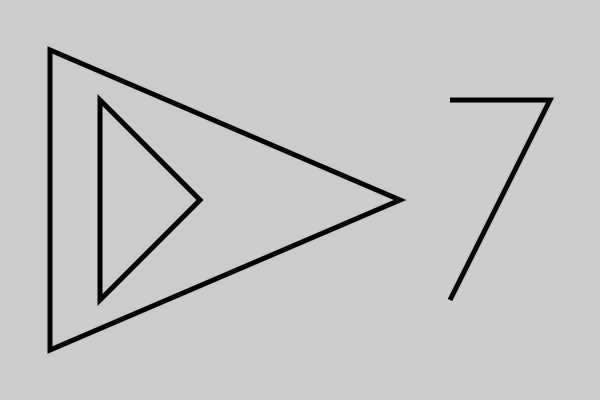

In [55]:
# Sub path 1 - closed shape
ctx.move_to(50,50)
ctx.line_to(400,200)
ctx.line_to(50,350)
ctx.close_path()

# Sub path 2 - sequentially joined lines
ctx.move_to(450,100)
ctx.line_to(550,100)
ctx.line_to(450,300)

# Sub path 3 - closed shape
ctx.move_to(100,100)
ctx.line_to(200,200)
ctx.line_to(100,300)
ctx.close_path()

# Setting line color and width
ctx.set_source_rgb(0,0,0)
ctx.set_line_width(5)

# Stroke sub paths into one path
ctx.stroke()

# Save surface to file
surface.write_to_png('paths.png')

# Display the image within the notebook
display(Image(filename='paths.png'))

# Drawing a Line given Length and Angle
If we want to draw a line between start point `(x1,y1)` at an angle `a` radians from the x-axis which has a length `r`, we need to apply trigonometry functions.

## Using SOH CAH TOA
We form a mental right angled triangle below  

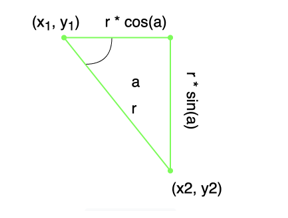  

Thus we can understand that:
1. `sin(a) = O/r thus O = r*sin(a)`
2. `cos(a) = A/r thus A = r*cos(a)`
3. `x2 = x1 + r*cos(a)`
4. `y2 = y1 + r*sin(a)`

When we apply this to code then do draw a line of specified length at an angle from a starting point given we can use the format:

`ctx.move_to(x1, y1)`  

`ctx.line_to(x1 + r * math.cos(a), y1 + r * math.sin(a))`

### Example

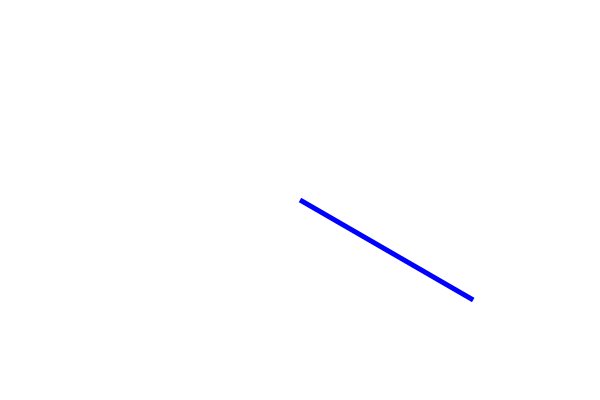

In [56]:
# Clear the surface
ctx.set_source_rgb(1, 1, 1) 
ctx.paint()

ctx.set_source_rgb(0,0,1)
ctx.set_line_width(5)

a = 0.523599
r = 200
x1 = 300
y1 = 200

ctx.move_to(x1,y1)
ctx.line_to(x1 + r * math.cos(a), y1 + r * math.sin(a))
ctx.stroke()

surface.write_to_png('drawingFn.png')

display(Image(filename='drawingFn.png'))

#### Sample Exercise  

Drawing the following Image

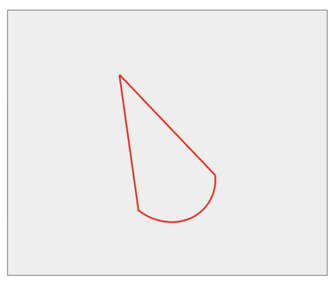

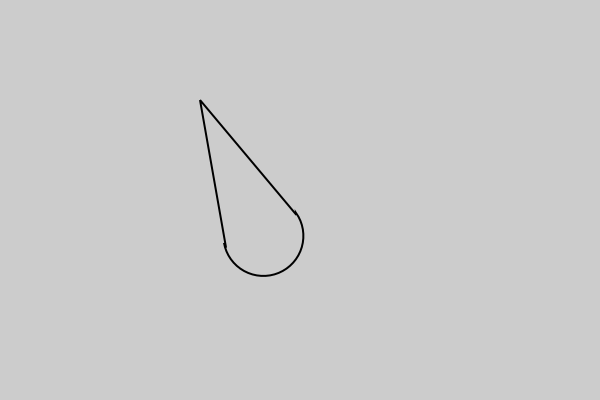

In [57]:
# Clear surface
ctx.set_source_rgb(0.8,0.8,0.8)
ctx.paint()

x1 = 200
y1 = 100
r = 150

# Drawing the lines
# Subpath 1
ctx.move_to(x1, y1)
ctx. line_to(x1 + r * math.cos(math.radians(50)), y1 + r * math.sin(math.radians(50)))
# Subpath 2
ctx.move_to(x1, y1)
ctx. line_to(x1 + r * math.cos(math.radians(80)), y1 + r * math.sin(math.radians(80)))

ctx.move_to(x1 + r * math.cos(math.radians(50)), y1 + r * math.sin(math.radians(50)))

# Arc subpath
ctx.arc(x1 + r * math.cos(math.radians(65)),
        y1 + r * math.sin(math.radians(65)),
        40,
        math.radians(-35), math.radians(170))

ctx.set_source_rgb(0,0,0)
ctx.set_line_width(2)
ctx.stroke()

surface.write_to_png('qn.png')

display(Image(filename='qn.png'))



## Relative Drawing Functions

In the example above the position of `(x2,y2)` is calculated as an offset from the current point `(x1,y1)` i.e its relative position is calculated.

The function `.rel_line_to()` allows us to specify the new point relative to the current new point thus we can simplify the code to:

1. `ctx.move_to(x1, y1)`

2. `ctx.rel_line_to(r*math.cos(a),r*math.sin(a))`

Similarly we have a rel_move_to() and rel_curve_to() function that operate in a similar way

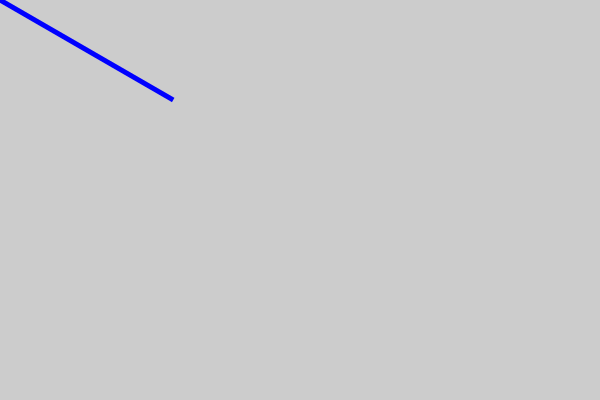

In [59]:
# Clear surface
ctx.set_source_rgb(0.8,0.8,0.8)
ctx.paint()

ctx.set_source_rgb(0,0,1)
ctx.set_line_width(5)

a = 0.523599
r = 200
x1 = 0
y1 = 0

ctx.move_to(x1,y1)
ctx.rel_line_to(r*math.cos(a), r*math.sin(a))
ctx.stroke()

surface.write_to_png('drawingFn.png')

display(Image(filename='drawingFn.png'))


# Drawing Arrows  
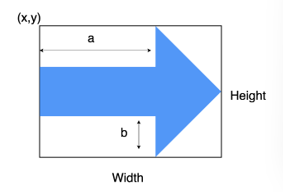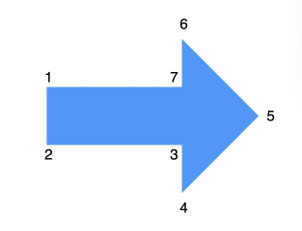

Below we can create a code template to create as many arrows as needed by calculating the positions of the 7 vertices given.

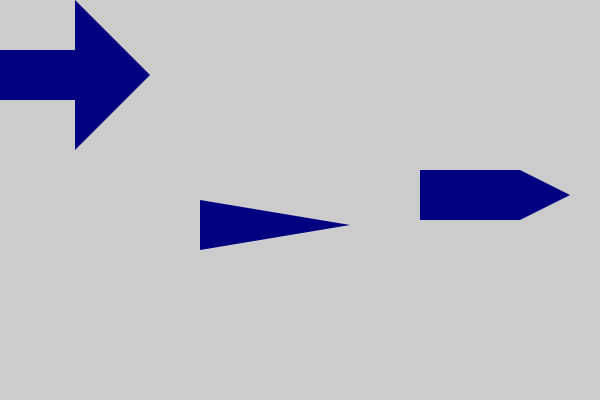

In [65]:
# Clear surface
ctx.set_source_rgb(0.8,0.8,0.8)
ctx.paint()

def arrow(ctx, x, y, width, height, a, b):
    ctx.move_to(x, y + b)
    ctx.line_to(x, y + height - b)
    ctx.line_to(x + a, y + height - b)
    ctx.line_to(x + a, y + height)
    ctx.line_to(x + width, y + height/2)
    ctx.line_to(x + a, y)
    ctx.line_to(x + a, y + b)
    ctx.close_path()

ctx.set_source_rgb(0,0,0.5)
arrow(ctx, 0, 0, 150, 150, 75, 50)
ctx.fill()

arrow(ctx, 420, 170, 150, 50, 100, 0)
ctx.fill()

arrow(ctx, 200, 200, 150, 50, 0, 100)
ctx.fill()

surface.write_to_png('arrow.png')

display(Image(filename='arrow.png'))